## Fraud Detection in Health Care Charges

### Objectives
The objective of this project is to apply unsupervised machine learning techniques, specifically PCA and KNN, to identify unusual data points in a dataset. By comparing and analyzing the results from these algorithms, we aim to assess their effectiveness in detecting outliers and gain insights into exceptional data patterns for potential business implications.

### Steps
#### Step 1: Data Preparation

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt          
%matplotlib inline     
sns.set(color_codes=True)

In [56]:
df = pd.read_csv("inpatientCharges.csv")
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [58]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [59]:
# Rename columns (remove spaces)
df.rename(columns = {' Total Discharges ': 'Total Discharges', ' Average Covered Charges ': 'Average Covered Charges', ' Average Total Payments ': 'Average Total Payments'}, inplace = True)
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [60]:
# Convert dtype
df['Average Covered Charges'] = df['Average Covered Charges'].replace('[\\$,]', '', regex=True).astype(float)
df['Average Total Payments'] = df['Average Total Payments'].replace('[\\$,]', '', regex=True).astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].replace('[\\$,]', '', regex=True).astype(float)
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
Total Discharges                          int64
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
dtype: object

In [61]:
df.loc[:, ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']]

,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,32963.07,5777.24,4763.73
1,15131.85,5787.57,4976.71
2,37560.37,5434.95,4453.79
3,13998.28,5417.56,4129.16
4,31633.27,5658.33,4851.44
...,...,...,...
163060,26314.39,3806.86,3071.39
163061,21704.72,4027.36,2649.72
163062,39121.73,5704.36,4058.36
163063,28873.09,7663.09,6848.54


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

In [63]:
# Check the duplicate rows
df[df.duplicated()].shape

(0, 12)

In [64]:
# Check the missing values
df.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64

In [65]:
# One-Hot Encoding
'''from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = df.loc[:, ['DRG Definition', 'Provider City', 'Provider State']]
ohe.fit(X)
X_ohe = ohe.transform(X).toarray()
X_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(X.columns))
X_df'''

"from sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\nX = df.loc[:, ['DRG Definition', 'Provider City', 'Provider State']]\nohe.fit(X)\nX_ohe = ohe.transform(X).toarray()\nX_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(X.columns))\nX_df"

#### Step 2: EDA

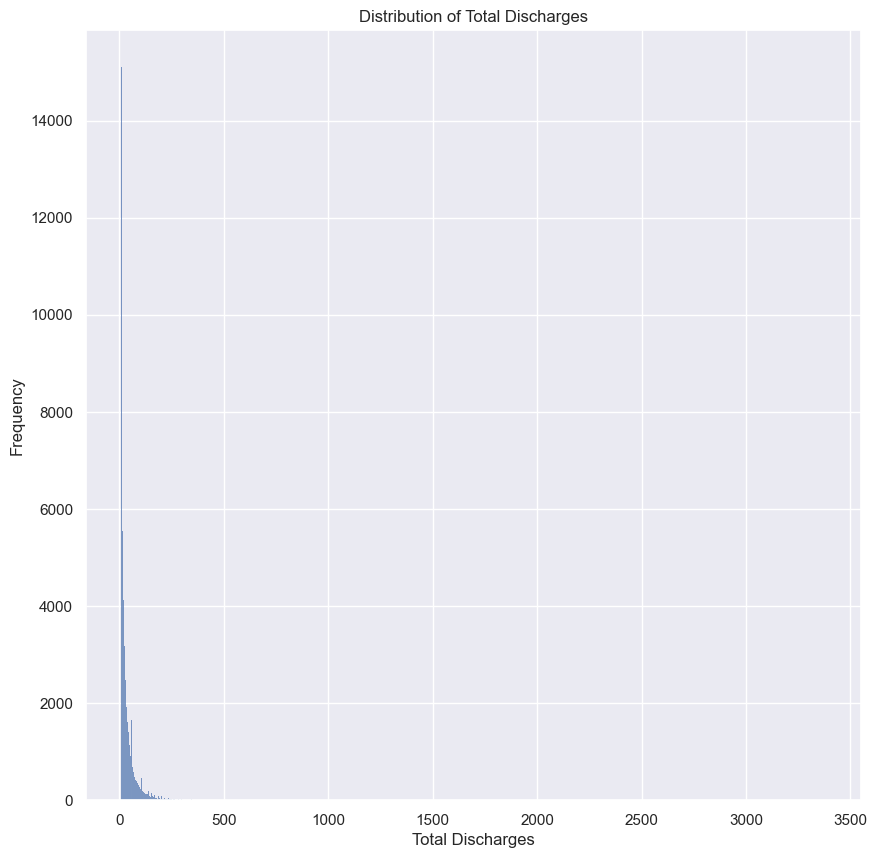

In [66]:
# Distribution of Single Variables
# Distribution of Total Discharges
plt.figure(figsize=(10, 10))
sns.histplot(df['Total Discharges'])
plt.title('Distribution of Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Frequency')
plt.show()

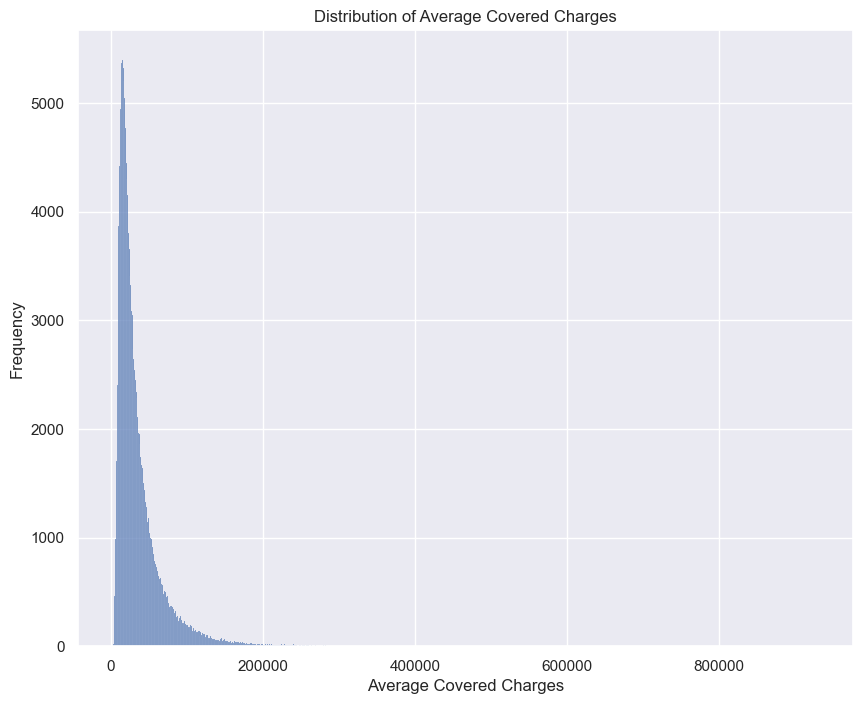

In [67]:
# Distribution of Average Covered Charges
plt.figure(figsize=(10, 8))
sns.histplot(df['Average Covered Charges'])
plt.title('Distribution of Average Covered Charges')
plt.xlabel('Average Covered Charges')
plt.ylabel('Frequency')
plt.show()

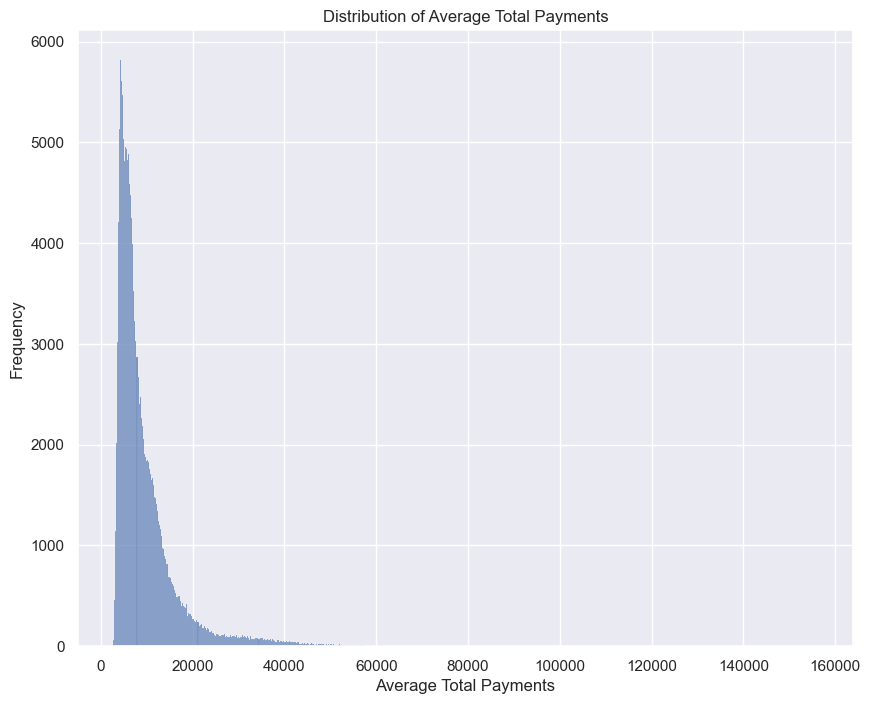

In [68]:
# Distribution of Average Total Payments
plt.figure(figsize=(10, 8))
sns.histplot(df['Average Total Payments'])
plt.title('Distribution of Average Total Payments')
plt.xlabel('Average Total Payments')
plt.ylabel('Frequency')
plt.show()

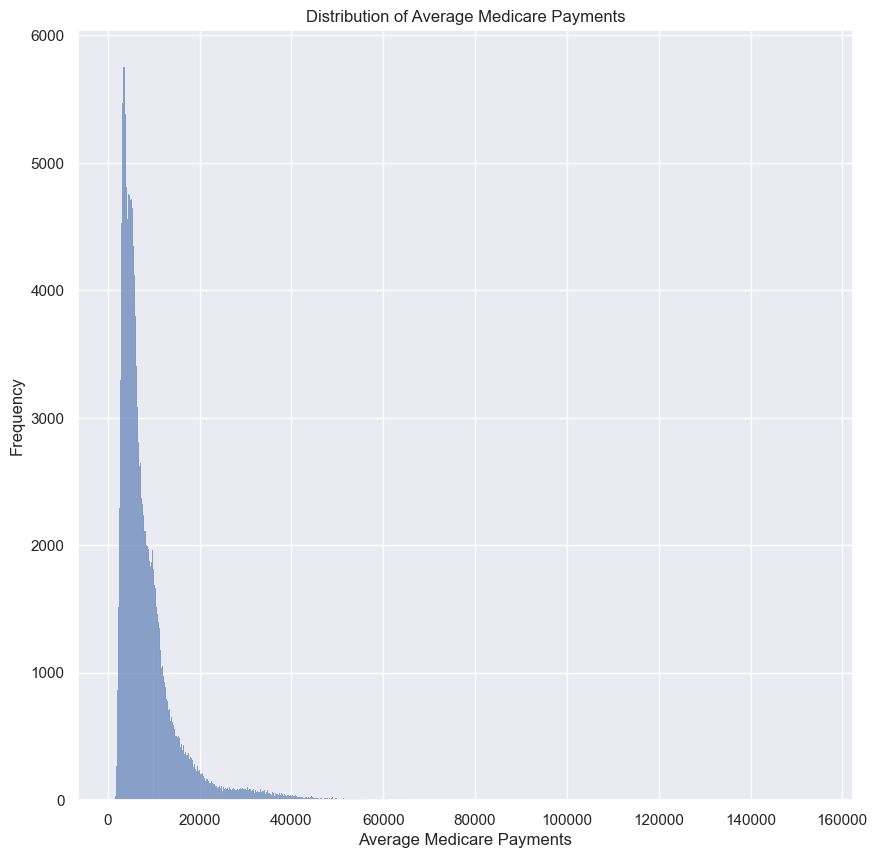

In [69]:
# Distribution of Average Medicare Payments
plt.figure(figsize=(10, 10))
sns.histplot(df['Average Medicare Payments'])
plt.title('Distribution of Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Frequency')
plt.show()

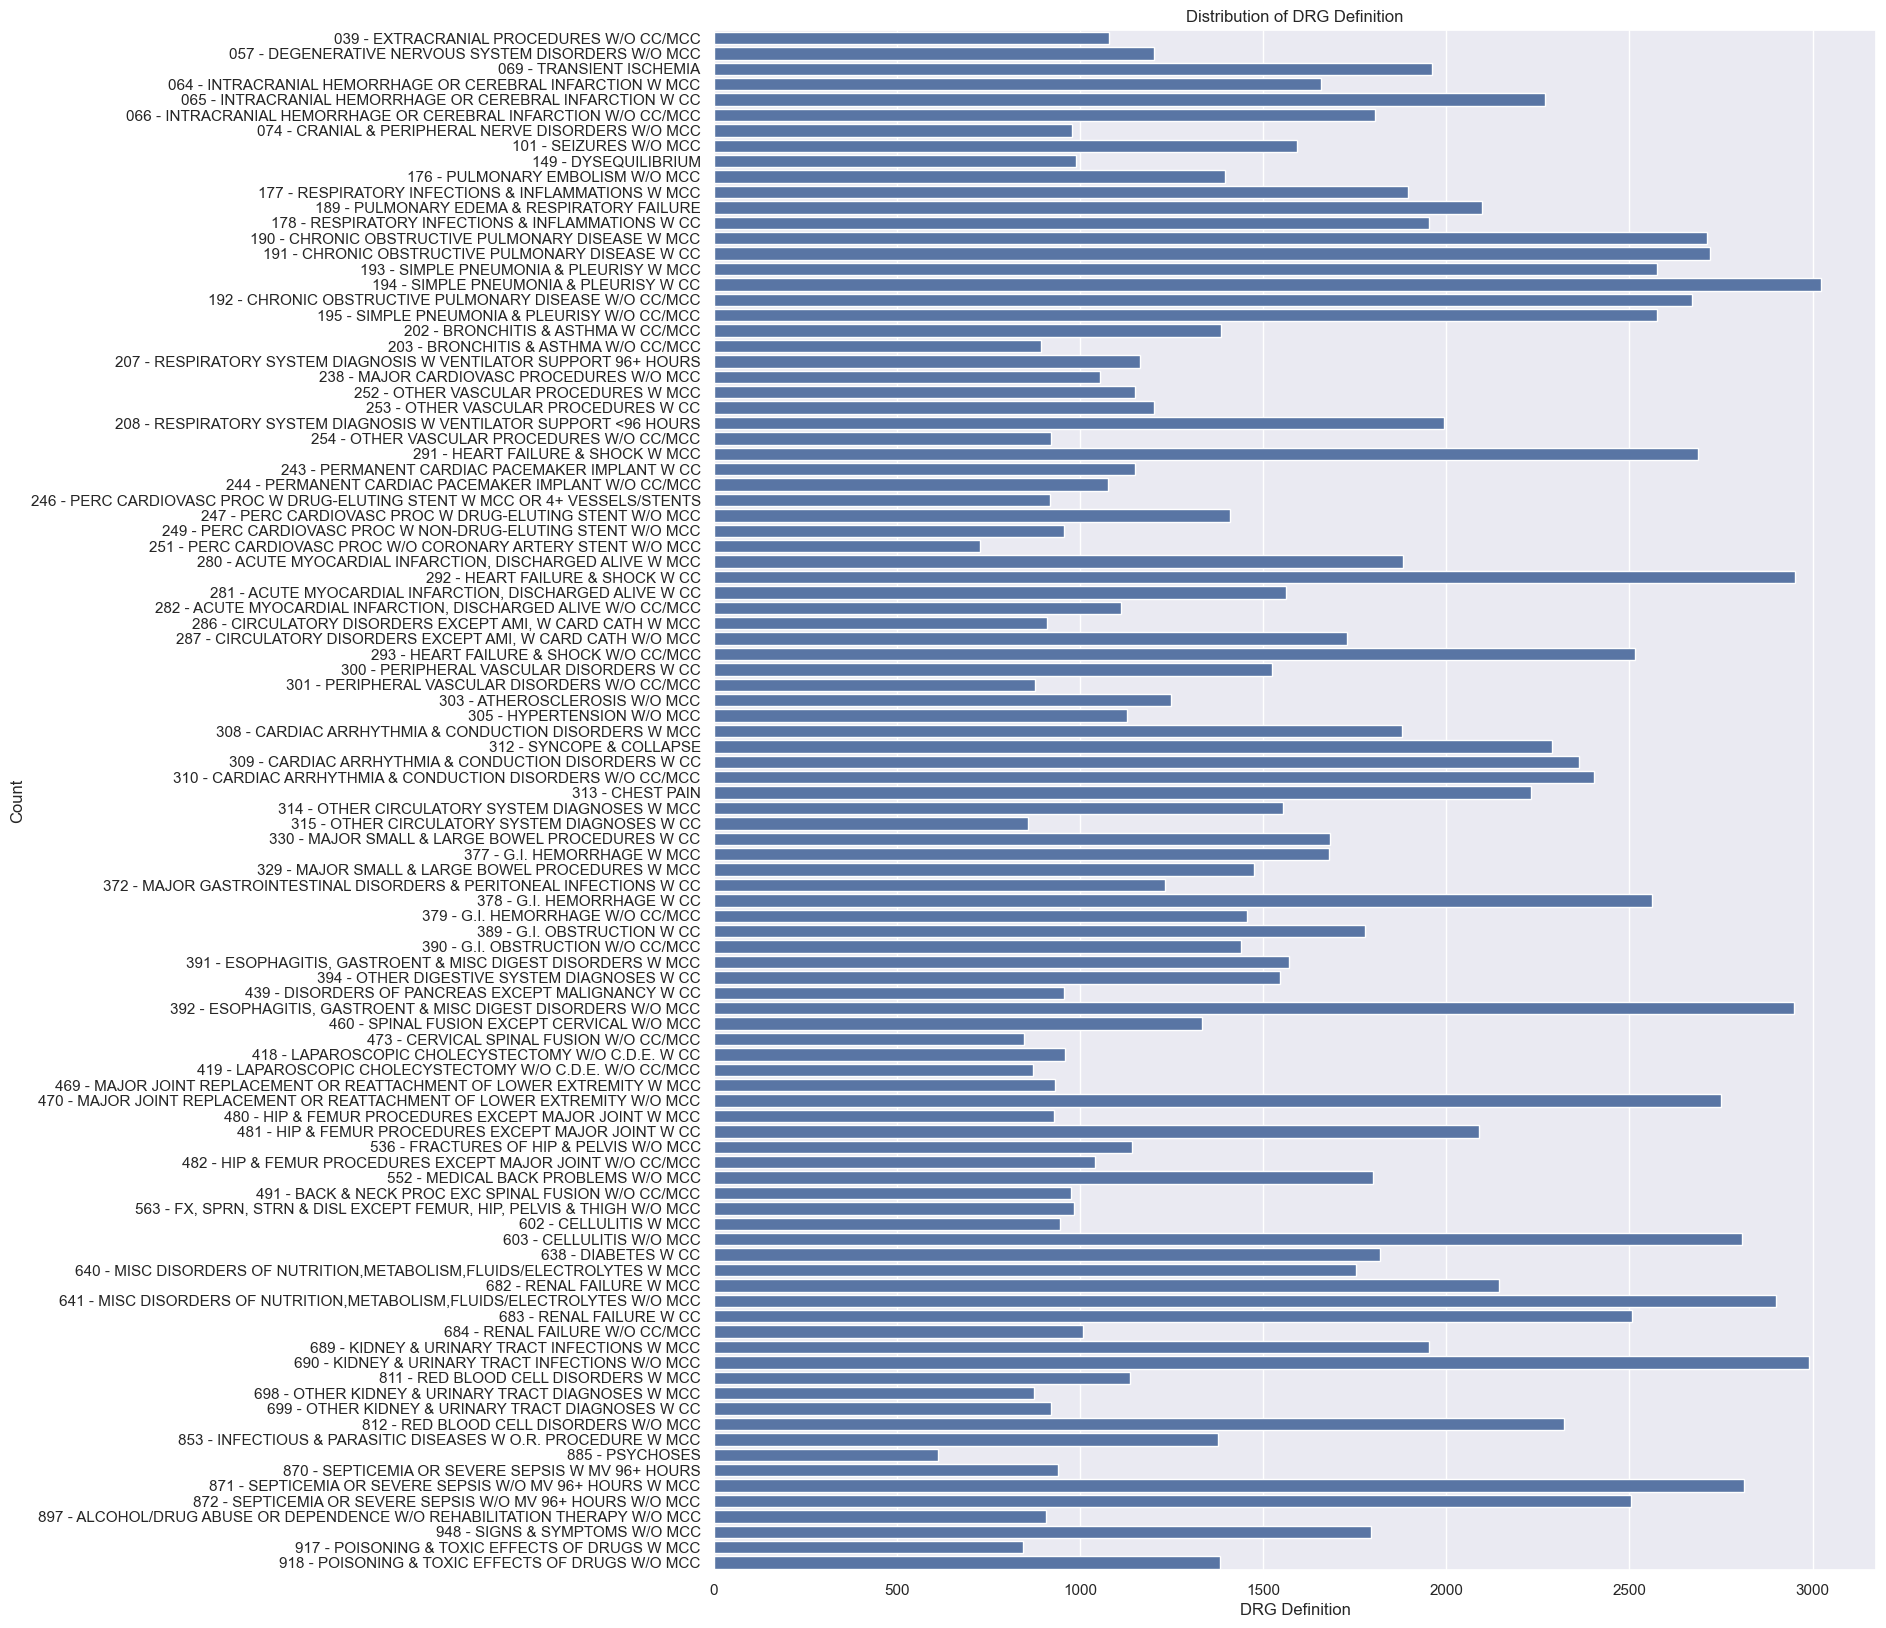

In [70]:
# Distribution of DRG Definition
plt.figure(figsize=(15, 20))
sns.countplot(df['DRG Definition'])
plt.title('Distribution of DRG Definition')
plt.xlabel('DRG Definition')
plt.ylabel('Count')
plt.show()

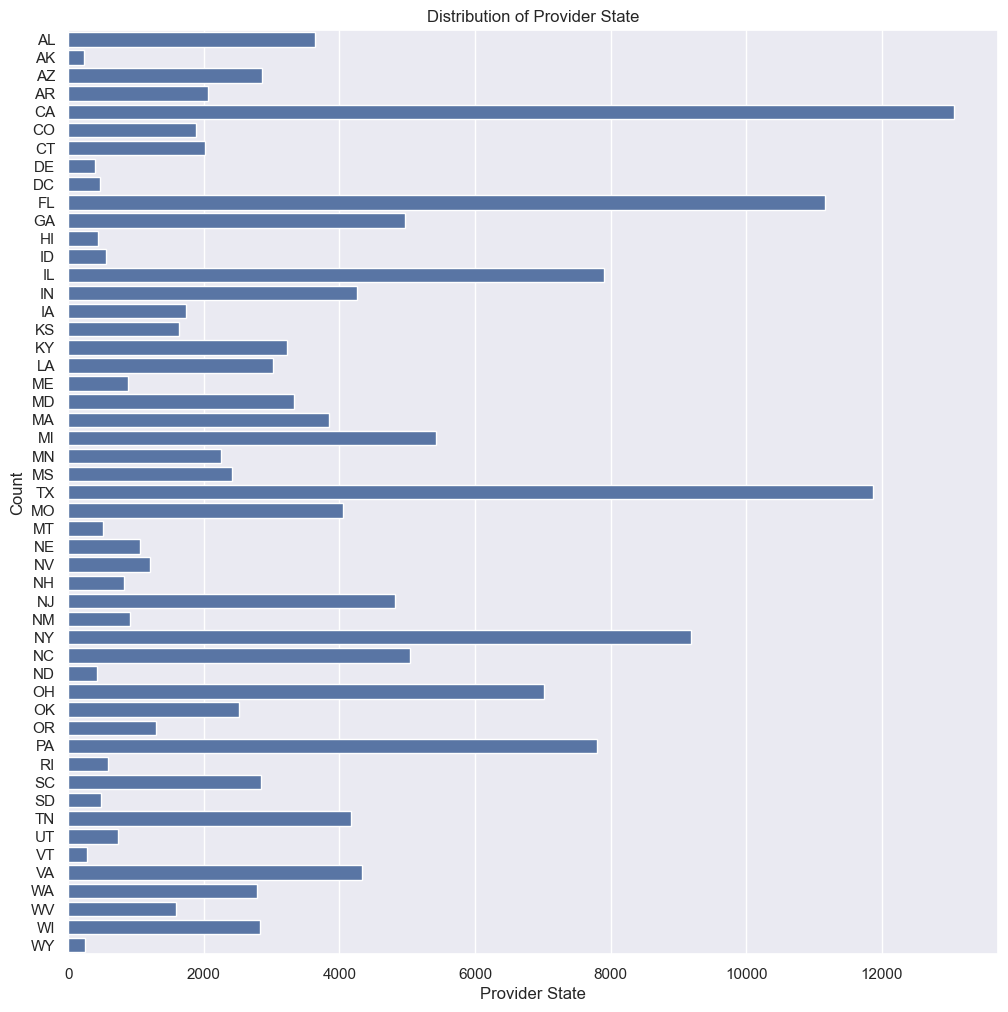

In [71]:
# Distribution of Provider State
plt.figure(figsize=(12, 12))
sns.countplot(df['Provider State'])
plt.title('Distribution of Provider State')
plt.xlabel('Provider State')
plt.ylabel('Count')
plt.show()

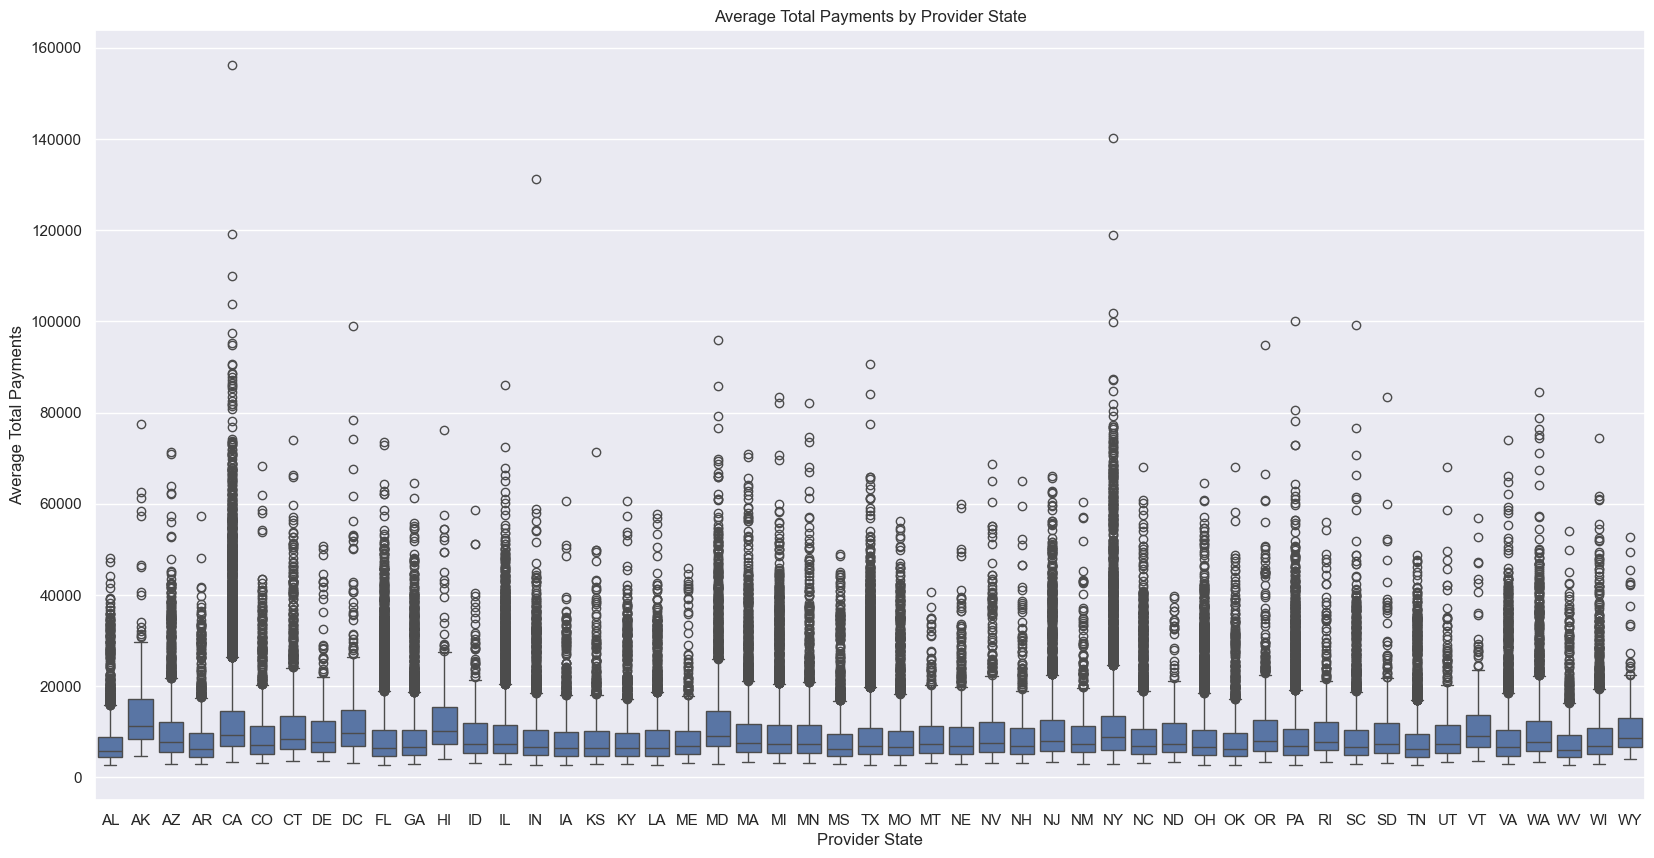

In [72]:
# Distribution of One Variable by Another Categorical Variable
# Boxplot of Average Total Payments by Provider State
plt.figure(figsize=(20, 10))
sns.boxplot(x='Provider State', y='Average Total Payments', data=df)
plt.title('Average Total Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Total Payments')
plt.show()

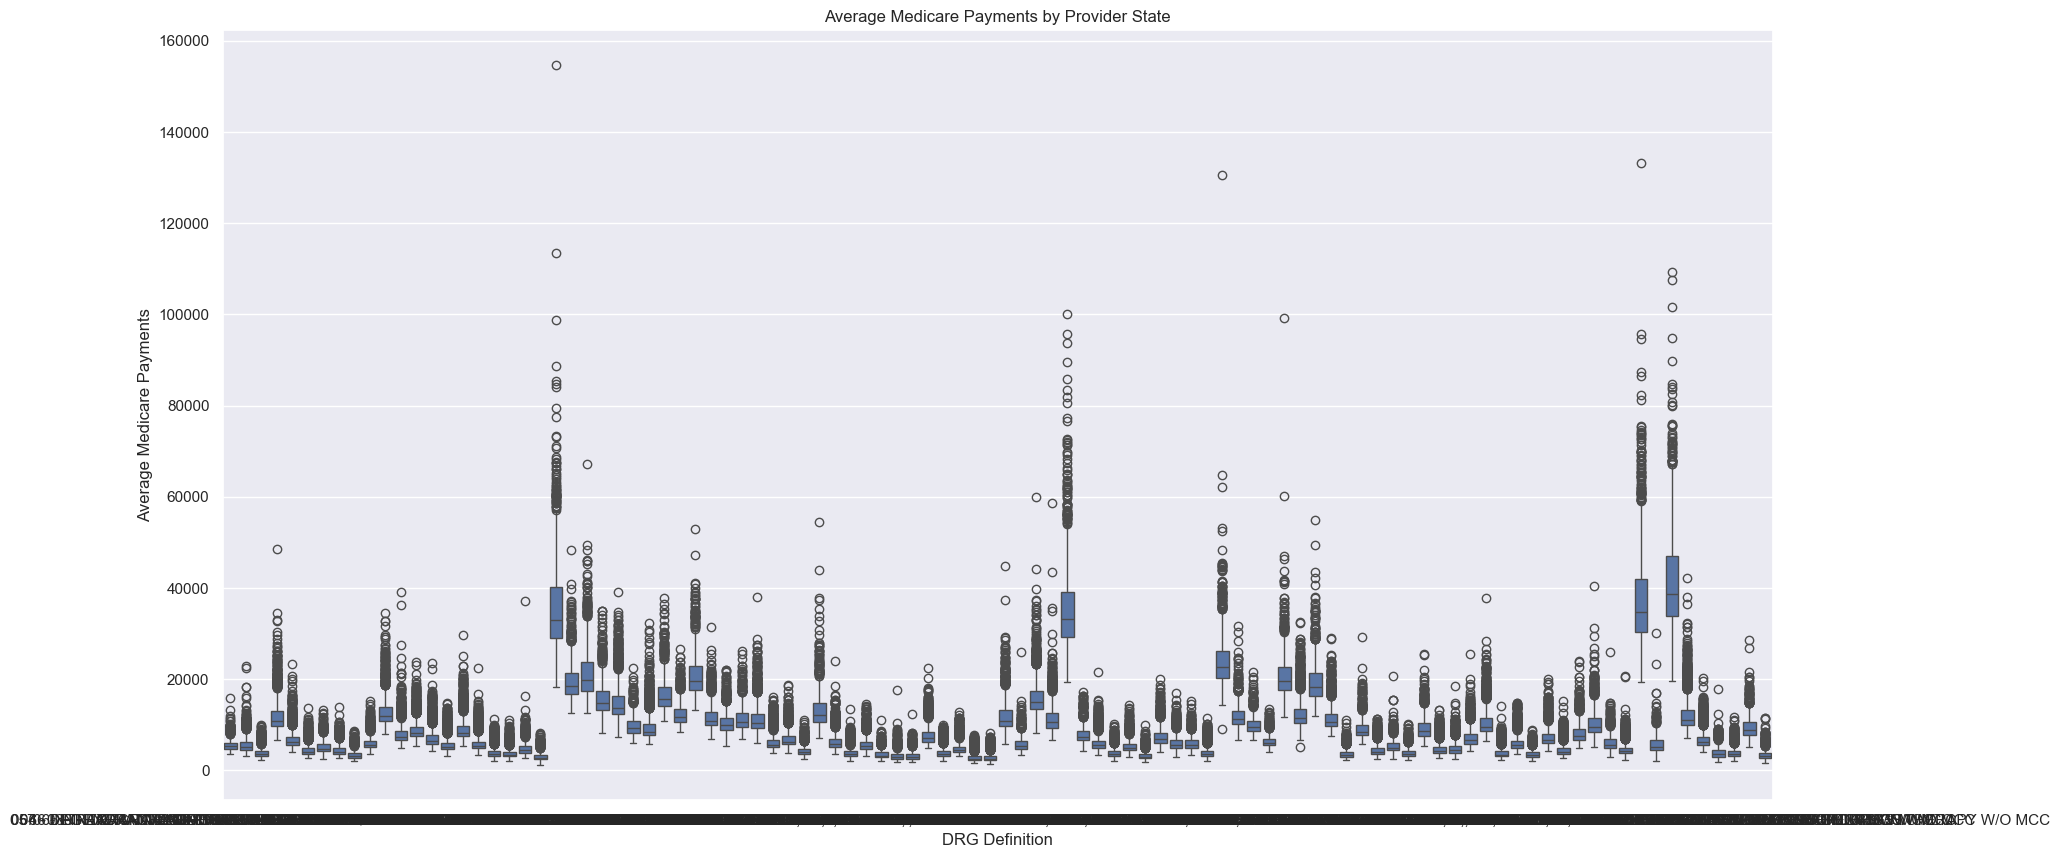

In [73]:
# Boxplot of Average Medicare Payments by DRG Definition
plt.figure(figsize=(20, 10))
sns.boxplot(x='DRG Definition', y='Average Medicare Payments', data=df)
plt.title('Average Medicare Payments by Provider State')
plt.xlabel('DRG Definition')
plt.ylabel('Average Medicare Payments')
plt.show()

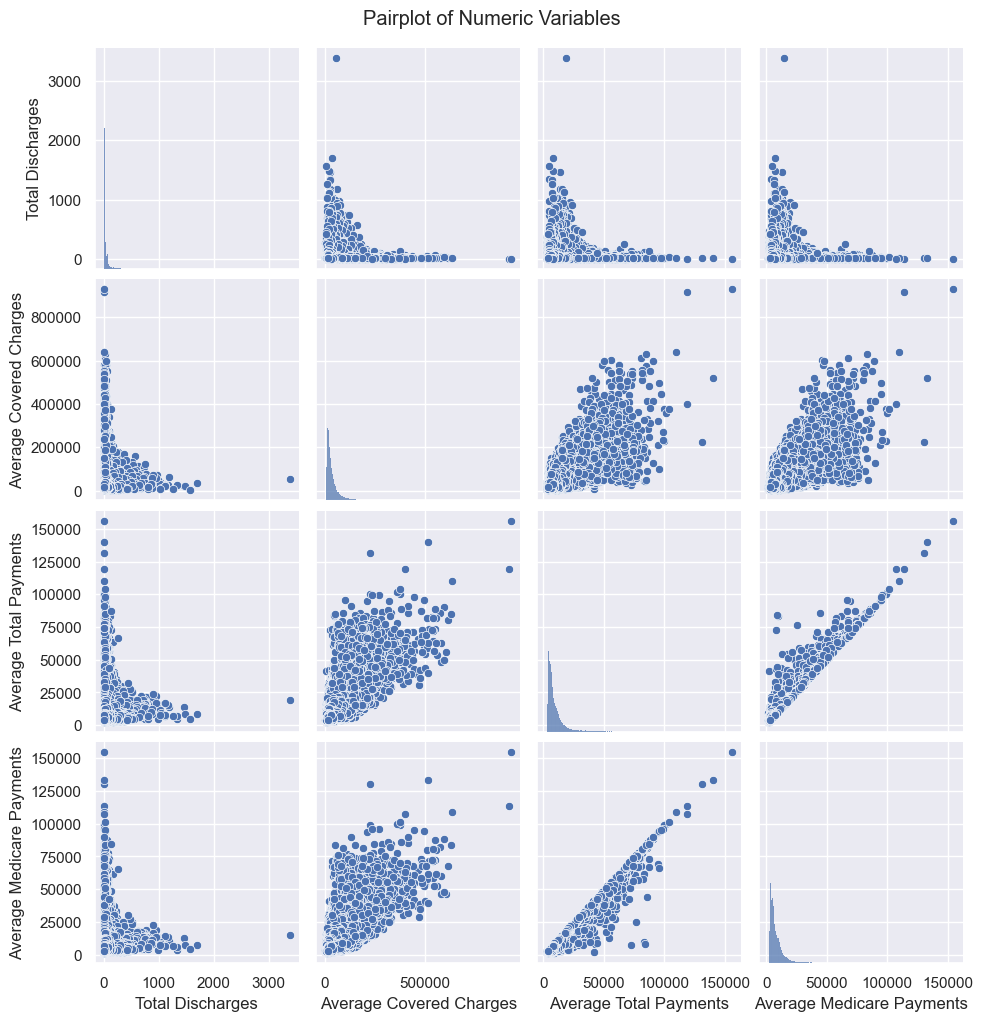

In [74]:
# Interactions of Two or Three Variables
# Pairplot for numeric variables
numeric_vars = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
sns.pairplot(df[numeric_vars])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

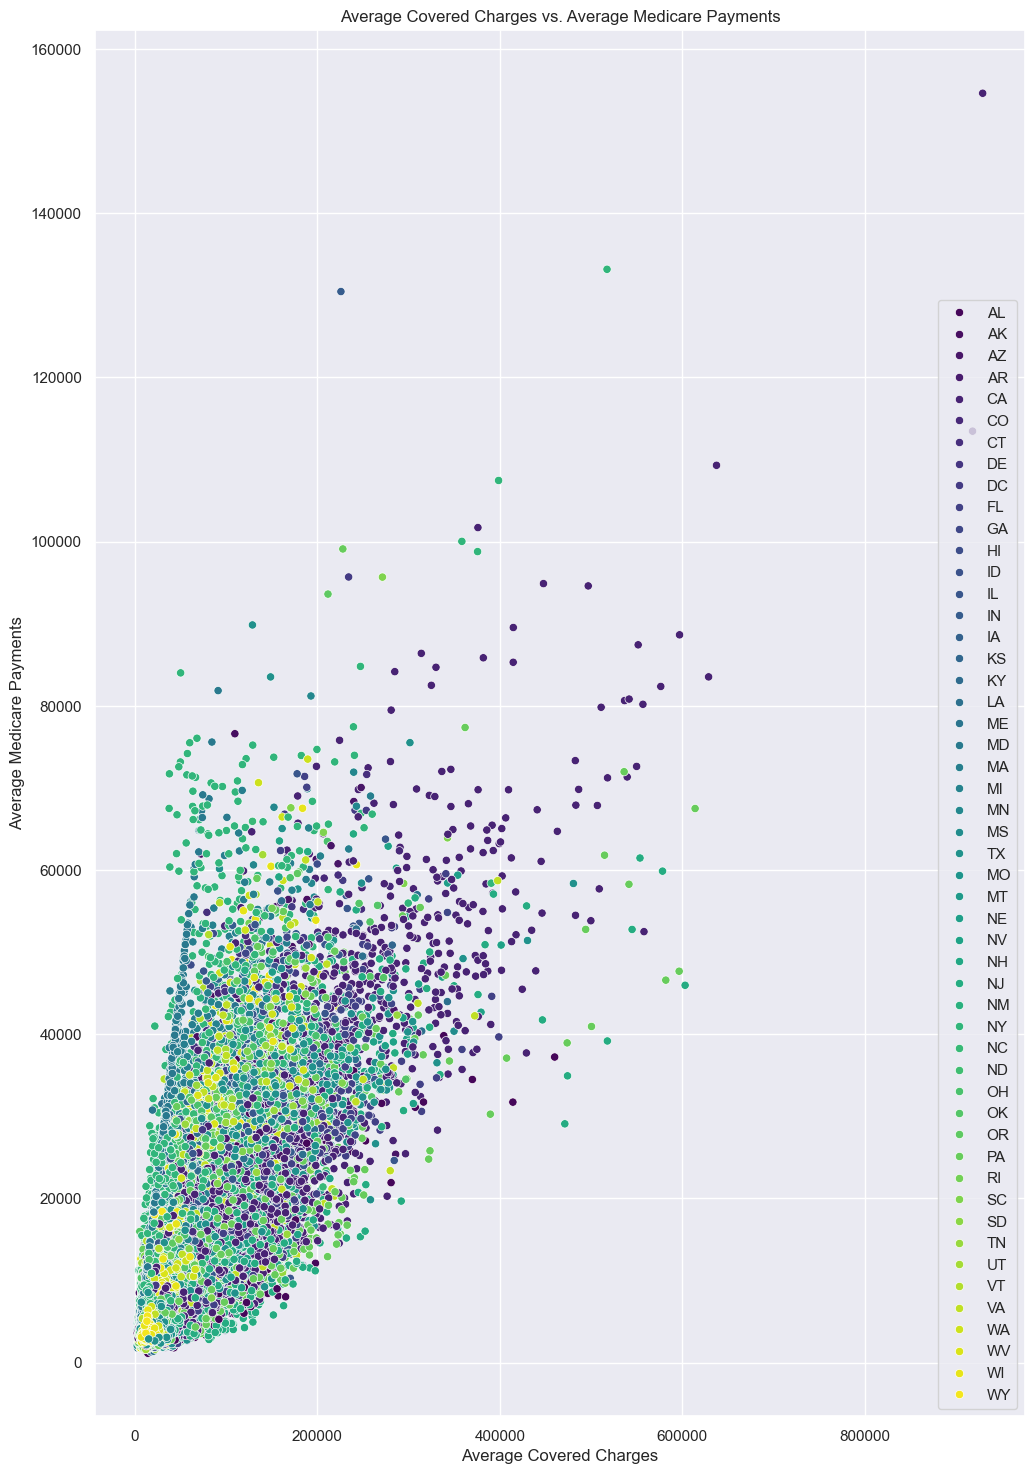

In [75]:
# Scatter plot for Average Covered Charges and Average Medicare Payments
plt.figure(figsize=(12, 18))
sns.scatterplot(x='Average Covered Charges', y='Average Medicare Payments', data=df, hue='Provider State', palette='viridis')
plt.title('Average Covered Charges vs. Average Medicare Payments')
plt.xlabel('Average Covered Charges')
plt.ylabel('Average Medicare Payments')
plt.legend(loc='lower right')
plt.show()

#### Step 3 : Create features

In [76]:
# Feature 1: Total Discharges Z-Score by State
df['Discharges_per_State_ZScore'] = (df['Total Discharges'] - df.groupby('Provider State')['Total Discharges'].transform('mean')) / df.groupby('Provider State')['Total Discharges'].transform('std')
# Summary: Z-score normalized 'Total Discharges' within each State.
# Insight: Identifies providers with unusual Discharges compared to the average one within their State.

In [77]:
# Feature 2: Total Discharges Z-Score by City
df['Discharges_per_City_ZScore'] = (df['Total Discharges'] - df.groupby('Provider City')['Total Discharges'].transform('mean')) / df.groupby('Provider City')['Total Discharges'].transform('std')
# Summary: Z-score normalized 'Total Discharges' within each City.
# Insight: Identifies providers with unusual Discharges compared to the average one within their City.

In [78]:
# Feature 3: Total Discharges Z-Score by DRG Definition
df['Discharges_per_DRG_ZScore'] = (df['Total Discharges'] - df.groupby('DRG Definition')['Total Discharges'].transform('mean')) / df.groupby('DRG Definition')['Total Discharges'].transform('std')
# Summary: Z-score normalized 'Total Discharges' within each DRG Definition.
# Insight: Identifies providers with unusual Discharges compared to the average one within each DRG Definition.

In [79]:
# Feature 4: Average Covered Charges Z-Score by State
df['Covered_Charges_per_State_ZScore'] = (df['Average Covered Charges'] - df.groupby('Provider State')['Average Covered Charges'].transform('mean')) / df.groupby('Provider State')['Average Covered Charges'].transform('std')
# Summary: Z-score normalized 'Average Covered Charges' within each State.
# Insight: Identifies providers with unusual Covered Charges compared to the average one within their State.

In [80]:
# Feature 5: Average Covered Charges Z-Score by City
df['Covered_Charges_per_City_ZScore'] = (df['Average Covered Charges'] - df.groupby('Provider City')['Average Covered Charges'].transform('mean')) / df.groupby('Provider City')['Average Covered Charges'].transform('std')
# Summary: Z-score normalized 'Average Covered Charges' within each City.
# Insight: Identifies providers with unusual Covered Charges compared to the average one within their City.

In [81]:
# Feature 6: Average Covered Charges Z-Score by DRG Definition
df['Covered_Charges_per_DRG_ZScore'] = (df['Average Covered Charges'] - df.groupby('DRG Definition')['Average Covered Charges'].transform('mean')) / df.groupby('DRG Definition')['Average Covered Charges'].transform('std')
# Summary: Z-score normalized 'Average Covered Charges' within each DRG Definition.
# Insight: Identifies providers with unusual Covered Charges compared to the average one within each DRG Definition.

In [82]:
# Feature 7: Average Total Payments Z-Score by State
df['Total_Payments_per_State_ZScore'] = (df['Average Total Payments'] - df.groupby('Provider State')['Average Total Payments'].transform('mean')) / df.groupby('Provider State')['Average Total Payments'].transform('std')
# Summary: Z-score normalized 'Average Total Payments' within each State.
# Insight: Identifies providers with unusual Total Payments compared to the average one within their State.

In [83]:
# Feature 8: Average Total Payments Z-Score by City
df['Total_Payments_per_City_ZScore'] = (df['Average Total Payments'] - df.groupby('Provider City')['Average Total Payments'].transform('mean')) / df.groupby('Provider City')['Average Total Payments'].transform('std')
# Summary: Z-score normalized 'Average Total Payments' within each City.
# Insight: Identifies providers with unusual Total Payments compared to the average one within their City.

In [84]:
# Feature 9: Average Total Payments Z-Score by DRG Definition
df['Total_Payments_per_DRG_ZScore'] = (df['Average Total Payments'] - df.groupby('DRG Definition')['Average Total Payments'].transform('mean')) / df.groupby('DRG Definition')['Average Total Payments'].transform('std')
# Summary: Z-score normalized 'Average Total Payments' within each DRG Definition.
# Insight: Identifies providers with unusual Total Payments compared to the average one within each DRG Definition.

In [85]:
# Feature 10: Average Medicare Payments Z-Score by State
df['Medicare_Payments_per_State_ZScore'] = (df['Average Medicare Payments'] - df.groupby('Provider State')['Average Medicare Payments'].transform('mean')) / df.groupby('Provider State')['Average Medicare Payments'].transform('std')
# Summary: Z-score normalized 'Average Medicare Payments' within each State.
# Insight: Identifies providers with unusual Medicare Payments compared to the average one within their State.

In [86]:
# Feature 11: Average Medicare Payments Z-Score by City
df['Medicare_Payments_per_City_ZScore'] = (df['Average Medicare Payments'] - df.groupby('Provider City')['Average Medicare Payments'].transform('mean')) / df.groupby('Provider City')['Average Medicare Payments'].transform('std')
# Summary: Z-score normalized 'Average Medicare Payments' within each City.
# Insight: Identifies providers with unusual Medicare Payments compared to the average one within their City.

In [87]:
# Feature 12: Average Medicare Payments Z-Score by DRG Definition
df['Medicare_Payments_per_DRG_ZScore'] = (df['Average Medicare Payments'] - df.groupby('DRG Definition')['Average Medicare Payments'].transform('mean')) / df.groupby('DRG Definition')['Average Medicare Payments'].transform('std')
# Summary: Z-score normalized 'Average Medicare Payments' within each DRG Definition.
# Insight: Identifies providers with unusual Medicare Payments compared to the average one within each DRG Definition.

In [88]:
# Feature 13: Payments Coverage Ratio Z-Score by State
df['Payments_Coverage_Ratio'] = df['Average Total Payments'] / df['Average Covered Charges']
df['Payments_Coverage_Ratio_per_State_ZScore'] = (df['Payments_Coverage_Ratio'] - df.groupby('Provider State')['Payments_Coverage_Ratio'].transform('mean')) / df.groupby('Provider State')['Payments_Coverage_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Total Payments to Average Covered Charges within each State.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Payments to Charges within their State.

In [89]:
# Feature 14: Payments Coverage Ratio Z-Score by DRG Definition
df['Payments_Coverage_Ratio_per_DRG_ZScore'] = (df['Payments_Coverage_Ratio'] - df.groupby('DRG Definition')['Payments_Coverage_Ratio'].transform('mean')) / df.groupby('DRG Definition')['Payments_Coverage_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Total Payments to Average Covered Charges within each DRG Definition.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Payments to Charges within each DRG Definition.

In [90]:
# Feature 15: Medicare Coverage Ratio Z-Score by State
df['Medicare_Coverage_Ratio'] = df['Average Medicare Payments'] / df['Average Covered Charges']
df['Medicare_Coverage_Ratio_per_State_ZScore'] = (df['Medicare_Coverage_Ratio'] - df.groupby('Provider State')['Medicare_Coverage_Ratio'].transform('mean')) / df.groupby('Provider State')['Medicare_Coverage_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Medicare Payments to Average Covered Charges within each State.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Medicare to Charges within their State.

In [91]:
# Feature 16: Medicare Coverage Ratio Z-Score by DRG Definition
df['Medicare_Coverage_Ratio_per_DRG_ZScore'] = (df['Medicare_Coverage_Ratio'] - df.groupby('DRG Definition')['Medicare_Coverage_Ratio'].transform('mean')) / df.groupby('DRG Definition')['Medicare_Coverage_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Medicare Payments to Average Covered Charges within each DRG Definition.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Medicare to Charges within each DRG Definition.

In [92]:
# Feature 17: Medicare Payments Ratio Z-Score by State
df['Medicare_Payments_Ratio'] = df['Average Medicare Payments'] / df['Average Total Payments']
df['Medicare_Payments_Ratio_per_State_ZScore'] = (df['Medicare_Payments_Ratio'] - df.groupby('Provider State')['Medicare_Payments_Ratio'].transform('mean')) / df.groupby('Provider State')['Medicare_Payments_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Medicare Payments to Average Total Payments within each State.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Medicare to Total Payments within their State.

In [93]:
# Feature 18: Medicare Payments Ratio Z-Score by DRG Definition
df['Medicare_Payments_Ratio_per_DRG_ZScore'] = (df['Medicare_Payments_Ratio'] - df.groupby('DRG Definition')['Medicare_Payments_Ratio'].transform('mean')) / df.groupby('DRG Definition')['Medicare_Payments_Ratio'].transform('std')
# Summary: Z-score normalized ratio of Average Medicare Payments to Average Total Payments within each DRG Definition.
# Insight: Helps identify providers with abnormal billing practices by considering the ratio of Medicare to Total Payments within each DRG Definition.

In [94]:
# Feature 19: Payment Difference Z-Score by State
df['Payment_Difference'] = df['Average Total Payments'] - df['Average Medicare Payments']
df['Payment_Difference_per_State_ZScore'] = (df['Payment_Difference'] - df.groupby('Provider State')['Payment_Difference'].transform('mean')) / df.groupby('Provider State')['Payment_Difference'].transform('std')
# Summary: Z-score normalized difference between 'Average Total Payments' and 'Average Medicare Payments' within each State.
# Insight: Helps identify providers whose total payments significantly deviate from the average difference between total payments and Medicare payments within their respective states.

In [95]:
# Feature 20: Payment Difference Z-Score by DRG Definition
df['Payment_Difference_per_DRG_ZScore'] = (df['Payment_Difference'] - df.groupby('DRG Definition')['Payment_Difference'].transform('mean')) / df.groupby('DRG Definition')['Payment_Difference'].transform('std')
# Summary: Z-score normalized difference between 'Average Total Payments' and 'Average Medicare Payments' within each DRG Definition.
# Insight: Helps identify providers whose total payments deviate significantly from the average difference between total payments and Medicare payments within specific DRG categories.

#### Step 4: Use two PyOD methods - PCA and KNNs

In [96]:
from pyod.models.pca import PCA 
from pyod.models.knn import KNN

In [97]:
features = ['Discharges_per_State_ZScore', 'Discharges_per_City_ZScore', 'Discharges_per_DRG_ZScore', 'Covered_Charges_per_State_ZScore', 'Covered_Charges_per_City_ZScore', 'Covered_Charges_per_DRG_ZScore', 'Total_Payments_per_State_ZScore', 'Total_Payments_per_City_ZScore', 'Total_Payments_per_DRG_ZScore', 'Medicare_Payments_per_State_ZScore', 'Medicare_Payments_per_City_ZScore', 'Medicare_Payments_per_DRG_ZScore', 'Payments_Coverage_Ratio_per_State_ZScore', 'Payments_Coverage_Ratio_per_DRG_ZScore', 'Medicare_Coverage_Ratio_per_State_ZScore', 'Medicare_Coverage_Ratio_per_DRG_ZScore', 'Medicare_Payments_Ratio_per_State_ZScore', 'Medicare_Payments_Ratio_per_DRG_ZScore', 'Payment_Difference_per_State_ZScore', 'Payment_Difference_per_DRG_ZScore']
df[features]

,Discharges_per_State_ZScore,Discharges_per_City_ZScore,Discharges_per_DRG_ZScore,Covered_Charges_per_State_ZScore,Covered_Charges_per_City_ZScore,Covered_Charges_per_DRG_ZScore,Total_Payments_per_State_ZScore,Total_Payments_per_City_ZScore,Total_Payments_per_DRG_ZScore,Medicare_Payments_per_State_ZScore,Medicare_Payments_per_City_ZScore,Medicare_Payments_per_DRG_ZScore,Payments_Coverage_Ratio_per_State_ZScore,Payments_Coverage_Ratio_per_DRG_ZScore,Medicare_Coverage_Ratio_per_State_ZScore,Medicare_Coverage_Ratio_per_DRG_ZScore,Medicare_Payments_Ratio_per_State_ZScore,Medicare_Payments_Ratio_per_DRG_ZScore,Payment_Difference_per_State_ZScore,Payment_Difference_per_DRG_ZScore
0,1.190044,0.832397,2.731021,0.052023,-0.253140,0.155639,-0.341775,-0.456736,-0.800673,-0.327975,-0.444381,-0.640831,-0.826641,-0.724848,-0.781793,-0.654036,0.083578,0.280187,-0.188003,-0.428701
1,-0.580935,-0.819453,-0.782309,-0.511336,-0.147131,-0.962919,-0.339804,-0.376991,-0.793683,-0.285750,-0.293387,-0.468526,0.330623,0.671373,0.413597,0.807470,0.455131,0.709427,-0.466677,-0.650785
2,-0.350937,-0.576670,-0.326033,0.197270,-0.141190,0.444029,-0.407094,-0.534900,-1.032283,-0.389424,-0.524413,-0.891578,-0.997344,-0.930799,-0.949979,-0.859663,0.029978,0.218266,-0.232490,-0.464153
3,-0.327938,-0.443947,-0.280405,-0.547150,-0.749566,-1.034028,-0.410412,-0.537415,-1.044050,-0.453785,-0.540631,-1.154211,0.355979,0.701964,0.193717,0.538641,-0.572572,-0.477835,0.190011,-0.127449
4,-0.488936,-0.569835,-0.599799,0.010009,-0.358372,0.072220,-0.364466,-0.468360,-0.881133,-0.310586,-0.385997,-0.569872,-0.806487,-0.700532,-0.724427,-0.583899,0.428854,0.679070,-0.472137,-0.655136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,-0.364422,-0.253104,-0.266323,-0.447160,-0.530860,0.806623,-0.781713,-0.815094,-0.752846,-0.747961,-0.763951,-0.700334,-0.895100,-1.031103,-0.881454,-0.958380,-0.321585,-0.007676,-0.444378,-0.289261
163061,-0.614979,-0.678164,-0.891072,-0.583076,-0.709216,0.336077,-0.750011,-0.837560,-0.589764,-0.812339,-0.905984,-1.051954,-0.569743,-0.793864,-0.834022,-0.923236,-1.934728,-2.020201,0.085965,0.754004
163062,-0.447941,-0.312309,-0.474573,-0.069539,-0.441216,2.113971,-0.508903,-0.708629,0.650549,-0.597275,-0.773496,0.122675,-0.886011,-1.024475,-0.996311,-1.043480,-1.354817,-1.296715,0.307593,1.189980
163063,-0.614979,-0.851358,-0.891072,-0.371718,-0.685791,1.067810,-0.227290,-0.947774,2.099231,-0.171285,-0.900775,2.449336,0.065740,-0.330495,0.184412,-0.168654,0.620037,1.167072,-0.379069,-0.160788


##### PCA

In [119]:
# Build the PCA model
X = df[features].fillna(0)
pca = PCA()
pca.fit(X)

# Predict the outlier scores
outlier_scores_pca = pca.decision_scores_
outlier_scores_pca

array([211436.71430356, 153288.5712336 , 158537.25908731, ...,
       227696.31503622, 238665.02810694, 173547.9047372 ])

In [120]:
pca.get_params()

{'contamination': 0.1,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [121]:
[pca.explained_variance_, pca.explained_variance_ratio_]

[array([5.88755372e+00, 4.17343633e+00, 2.87401926e+00, 2.39601261e+00,
        2.06530056e+00, 7.88832977e-01, 5.26453689e-01, 3.15968747e-01,
        2.42930494e-01, 1.98735468e-01, 1.84036664e-01, 1.08618976e-01,
        1.03687565e-01, 5.59073291e-02, 3.94548392e-02, 2.51637820e-02,
        8.69014975e-03, 2.66102462e-03, 2.04651157e-03, 6.11964607e-04]),
 array([2.94375881e-01, 2.08670537e-01, 1.43700082e-01, 1.19799896e-01,
        1.03264395e-01, 3.94414070e-02, 2.63225230e-02, 1.57983404e-02,
        1.21464502e-02, 9.93671245e-03, 9.20177679e-03, 5.43091551e-03,
        5.18434647e-03, 2.79534931e-03, 1.97272986e-03, 1.25818139e-03,
        4.34504823e-04, 1.33050415e-04, 1.02324951e-04, 3.05980427e-05])]

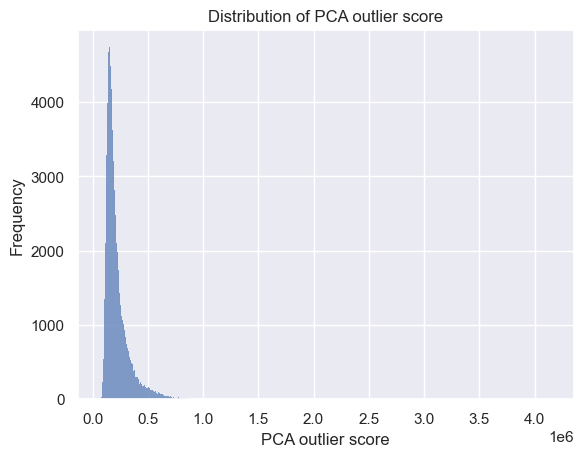

In [122]:
sns.histplot(outlier_scores_pca)
plt.title('Distribution of PCA outlier score')
plt.xlabel('PCA outlier score')
plt.ylabel('Frequency')
plt.show()

In [149]:
# Determine the threshold
threshold = pca.threshold_
threshold

355023.81758777745

In [150]:
# Descriptive statistics
def descriptive_stat_threshold(df, pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X, outlier_scores_pca, threshold)

,Group,Count,Count %,Discharges_per_State_ZScore,Discharges_per_City_ZScore,Discharges_per_DRG_ZScore,Covered_Charges_per_State_ZScore,Covered_Charges_per_City_ZScore,Covered_Charges_per_DRG_ZScore,Total_Payments_per_State_ZScore,...,Medicare_Payments_per_DRG_ZScore,Payments_Coverage_Ratio_per_State_ZScore,Payments_Coverage_Ratio_per_DRG_ZScore,Medicare_Coverage_Ratio_per_State_ZScore,Medicare_Coverage_Ratio_per_DRG_ZScore,Medicare_Payments_Ratio_per_State_ZScore,Medicare_Payments_Ratio_per_DRG_ZScore,Payment_Difference_per_State_ZScore,Payment_Difference_per_DRG_ZScore,Anomaly_Score
0,Normal,146758,89.999693,-0.06,-0.04,-0.04,-0.15,-0.15,-0.02,-0.18,...,-0.09,-0.06,-0.07,-0.06,-0.07,-0.01,0.03,-0.12,-0.08,188919.29
1,Outlier,16307,10.000307,0.52,0.38,0.33,1.37,1.33,0.20,1.65,...,0.77,0.53,0.66,0.52,0.61,0.09,-0.30,1.07,0.69,500006.28


##### KNN

In [138]:
# Build the KNN model
knn = KNN()
knn.fit(X)

# Predict the outlier scores
outlier_scores_knn = knn.decision_scores_
outlier_scores_knn

array([1.10839024, 0.58103238, 0.64692644, ..., 0.99943049, 0.92094323,
       0.55619755])

In [140]:
knn.get_params()

{'algorithm': 'auto',
 'contamination': 0.1,
 'leaf_size': 30,
 'method': 'largest',
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

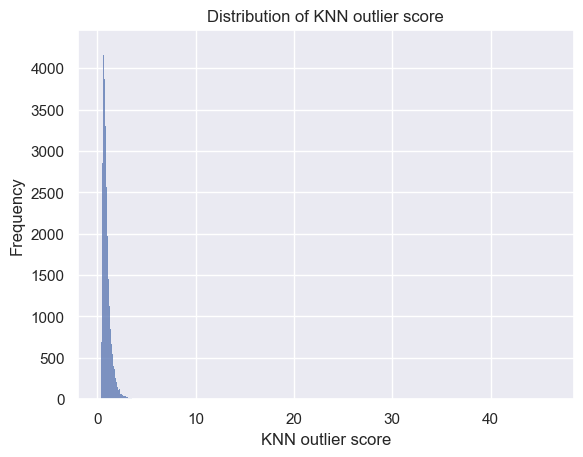

In [139]:
sns.histplot(outlier_scores_knn)
plt.title('Distribution of KNN outlier score')
plt.xlabel('KNN outlier score')
plt.ylabel('Frequency')
plt.show()

In [151]:
# Determine the threshold
threshold = knn.threshold_ 
threshold

1.494872308447656

In [152]:
# Descriptive statistics
def descriptive_stat_threshold(df, pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X, outlier_scores_knn, threshold)

,Group,Count,Count %,Discharges_per_State_ZScore,Discharges_per_City_ZScore,Discharges_per_DRG_ZScore,Covered_Charges_per_State_ZScore,Covered_Charges_per_City_ZScore,Covered_Charges_per_DRG_ZScore,Total_Payments_per_State_ZScore,...,Medicare_Payments_per_DRG_ZScore,Payments_Coverage_Ratio_per_State_ZScore,Payments_Coverage_Ratio_per_DRG_ZScore,Medicare_Coverage_Ratio_per_State_ZScore,Medicare_Coverage_Ratio_per_DRG_ZScore,Medicare_Payments_Ratio_per_State_ZScore,Medicare_Payments_Ratio_per_DRG_ZScore,Payment_Difference_per_State_ZScore,Payment_Difference_per_DRG_ZScore,Anomaly_Score
0,Normal,146758,89.999693,-0.09,-0.09,-0.07,-0.12,-0.12,-0.03,-0.15,...,-0.07,-0.04,-0.04,-0.03,-0.03,0.02,0.07,-0.15,-0.10,0.84
1,Outlier,16307,10.000307,0.84,0.77,0.67,1.12,1.11,0.28,1.33,...,0.63,0.37,0.38,0.29,0.28,-0.16,-0.59,1.35,0.93,2.06


##### Explain what PCA and KNNs are:

PCA:\
PCA is a dimensionality reduction technique that transforms a dataset into a new coordinate system, capturing the most significant information in the data by finding principal components. These components are linear combinations of the original variables, and they are ordered by the amount of variance they explain.\
In anomaly detection, PCA can be used to identify outliers by looking for data points that deviate significantly from the majority of the dataset along the principal components. Outliers may correspond to providers with unusual patterns in their health care charges.

KNN:\
KNN is a supervised or unsupervised learning algorithm used for classification and regression tasks. In the context of unsupervised learning, it can be applied to identify anomalies by measuring the distance of each data point to its K-nearest neighbors. Outliers are those points that have distant neighbors.\
In this project, KNN can be applied to measure the abnormality of each provider based on the distribution of health care charges. Providers with charges significantly different from their neighbors might be flagged as anomalies.

##### Business Insights:

Interpretation of Outliers: The business insight gained from this analysis is the identification of providers with suspicious billing patterns. Investigating and addressing the anomalies in this small cluster can lead to the detection and prevention of fraudulent activities, ultimately improving the overall integrity of the health care billing system.

Operational Improvements: The identification of anomalies provides an opportunity for the health care system to improve its monitoring and auditing processes. This can result in cost savings, enhanced compliance, and increased trust in the health care provider network.